In [5]:
# basic operations
import os
import re
import logging
import time
import pickle

# utilities
from pprint import pprint as pp

# data analysis/management/manipulation
import numpy as np
import pandas as pd
import sklearn

# text analysis
import gensim
from gensim.models import LdaModel, ldamodel
from gensim.models import LsiModel, lsimodel
from gensim.models import Phrases
from gensim.models import CoherenceModel  
from gensim.corpora import Dictionary
from gensim.similarities import MatrixSimilarity
'''
Uncomment the next two lines of code if you don't have a copy of the
Mallet software installed in your machine
'''
# ! wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip # * update if needed *
# ! unzip mallet-2.0.8.zip
MALLET_PATH = 'mallet-2.0.8/bin/mallet'
import spacy
import en_core_web_lg

# multivariate analysis
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

# distance metrics
from scipy.spatial.distance import cosine

# visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pyLDAvis
import pyLDAvis.gensim

# read data

In [6]:
# read docs_phrased
import pickle
with open('2data/insurance_times_docs_phrased.pickle', 'rb') as f:
    docs_it = pickle.load(f)
with open('2data/money_marketing_docs_phrased.pickle', 'rb') as f:
    docs_mm = pickle.load(f)
with open('2data/artemis_docs_phrased.pickle', 'rb') as f:
    docs_arti = pickle.load(f)
with open('2data/insurance_asset_risk_phrased.pickle', 'rb') as f:
    docs_ia = pickle.load(f)
with open('2data/Pensionage_LatestNews_docs_phrased.pickle', 'rb') as f:
    docs_pl = pickle.load(f)
with open('2data/actuarial_post_docs_phrased.pickle', 'rb') as f:
    docs_ap = pickle.load(f)
with open('2data/intelligent_insurer_docs_phrased.pickle', 'rb') as f:
    docs_ii = pickle.load(f)
with open('data/insurance_erm_phrased.pickle', 'rb') as f:
    docs_ie = pickle.load(f)

In [7]:
# read year data
with open('2data/insurance_times_year.pickle', 'rb') as f:
    year_it = pickle.load(f)
with open('2data/money_marketing_year.pickle', 'rb') as f:
    year_mm = pickle.load(f)
with open('2data/artemis_year.pickle', 'rb') as f:
    year_arti = pickle.load(f)
with open('2data/insurance_asset_risk_year.pickle', 'rb') as f:
    year_ia = pickle.load(f)
year_ia = [int(i) for i in year_ia]
with open('2data/insurance_erm_year.pickle', 'rb') as f:
    year_ie = pickle.load(f)
with open('2data/Pensionage_LatestNews_docs_phrased.pickle', 'rb') as f:
    year_pl = pickle.load(f)
year_pl = [2020]*449
with open('2data/actuarial_post_year.pickle', 'rb') as f:
    year_ap = pickle.load(f)
with open('2data/intelligent_insurer_year.pickle', 'rb') as f:
    year_ii = pickle.load(f)

## merge data

In [8]:
temp = docs_mm+docs_it+docs_pl+docs_arti+docs_ia+docs_ap+docs_ii
len(temp)

41418

In [9]:
temp_year = year_mm+year_it+year_pl+year_arti+year_ia+year_ap+year_ii
len(temp_year)

41418

In [10]:
set(temp_year)

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}

In [11]:
temp_year.index(1)

ValueError: 1 is not in list

In [12]:
del temp[23370]
del temp_year[23370]
print(len(temp))
print(len(temp_year))

41417
41417


In [13]:
set(temp_year)

{2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020}

In [14]:
my_stopwords = ['\x1c','m','\xa0','insurance','insurer','broker','subscribe','subscription','video','live','artemis','cat','interview','market']
temp = [[word for word in doc if word not in my_stopwords] for doc in temp ]

# topic modeling

In [11]:
# create dictionary and text corpus
DICT = Dictionary(temp)
CORPUS = [DICT.doc2bow(doc) for doc in temp]

In [12]:
# model 1
N_TOPICS = 6

# model estimation
LDA_MALLET = gensim.models.wrappers.LdaMallet(MALLET_PATH,
                                              corpus=CORPUS,
                                              num_topics=N_TOPICS,
                                              id2word=DICT,
                                              random_seed=123)

# print results
LDA_MALLET.print_topics(num_topics=N_TOPICS, num_words=10)

[(0,
  '0.029*"investment" + 0.028*"fund" + 0.020*"asset" + 0.019*"increase" + 0.017*"rate" + 0.013*"return" + 0.011*"growth" + 0.009*"low" + 0.009*"high" + 0.009*"premium"'),
 (1,
  '0.012*"management" + 0.010*"client" + 0.010*"solution" + 0.009*"role" + 0.009*"product" + 0.009*"manage" + 0.008*"head" + 0.008*"team" + 0.008*"global" + 0.008*"experience"'),
 (2,
  '0.040*"loss" + 0.017*"event" + 0.013*"hurricane" + 0.013*"impact" + 0.013*"industry" + 0.010*"estimate" + 0.009*"storm" + 0.009*"include" + 0.008*"catastrophe" + 0.008*"expect"'),
 (3,
  '0.054*"pension" + 0.023*"scheme" + 0.014*"benefit" + 0.014*"retirement" + 0.012*"member" + 0.011*"government" + 0.011*"life" + 0.010*"employer" + 0.009*"income" + 0.009*"plan"'),
 (4,
  '0.055*"reinsurance" + 0.042*"ils" + 0.040*"capital" + 0.038*"bond" + 0.028*"catastrophe" + 0.016*"security" + 0.015*"investor" + 0.011*"transaction" + 0.011*"deal" + 0.011*"reinsurer"'),
 (5,
  '0.009*"datum" + 0.008*"customer" + 0.008*"fca" + 0.006*"inform

38580


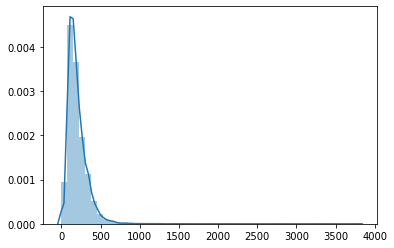

In [64]:
import seaborn as sns
print(len(temp))
a = [len(x) for x in temp]
sns.distplot(a)

##  Model evaluation

### Get range of coherence values as the number of retained topics change

In [41]:
# define function
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    -----------
    dictionary : Gensim dictionary
    corpus     : Gensim corpus
    texts      : List of input texts
    limit      : Max number of topics

    Returns:
    --------
    model_list       : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model
                       with respective number of topics
    """
    coherence_values = []
    model_list = []
    mallet_path = MALLET_PATH
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path,
                                                 corpus=corpus,
                                                 num_topics=num_topics,
                                                 id2word=dictionary,
                                                 random_seed=123)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:
# collect coherence scores as the number of retained topics change
LIMIT, START, STEP = 40, 1, 5
MODEL_LIST, COHER_VALS = compute_coherence_values(dictionary=DICT,
                                                  corpus=CORPUS,
                                                  texts=temp,
                                                  start=START,
                                                  limit=LIMIT,
                                                  step=STEP)

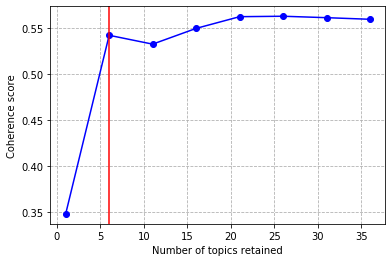

In [43]:
# plot collected coherence scores data

# data series
X = range(START, LIMIT, STEP)
Y = COHER_VALS

# create figure
FIG = plt.figure(figsize=(6, 4))
AX = FIG.add_subplot(1, 1, 1)

# plot data
AX.plot(X, Y, marker='o', color='b', ls='-')

# axes
AX.set_xlabel("Number of topics retained")
AX.set_ylabel("Coherence score")
AX.set_xticks(np.arange(0, 40, 5))

# reference line
AX.axvline(x=6, ymin=0, ymax=1, color='r')

# grid
AX.grid(True, ls='--')

# save plot to file
CWD = os.getcwd()
CWD = CWD
FOLDER = 'exhibits/appxB'
FILE = 'all_newstopwords.pdf'
plt.savefig(os.path.join(CWD, FOLDER, FILE),
            transparent=True,
            bbox_inches='tight',
            pad_inches=0)

plt.show()

In [13]:
# translate topic modeling outcome
LDA_MALLET_G = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(LDA_MALLET)

In [14]:
# ignore warnings coming from pyLDAvis
import warnings
warnings.filterwarnings('ignore')

# visualizing the outcome of the retained model -- this takes time
pyLDAvis.enable_notebook()
DATA_VIS = pyLDAvis.gensim.prepare(LDA_MALLET_G, CORPUS, DICT, sort_topics=False)
DATA_VIS

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.078544  0.053758       1        1  17.015190
1      0.103666 -0.347173       2        1  15.644274
2     -0.180678  0.117123       3        1  15.333826
3      0.203921  0.147999       4        1  16.239677
4     -0.257666 -0.054120       5        1  19.733773
5      0.209301  0.082412       6        1  16.033260, topic_info=              Term          Freq         Total Category  logprob  loglift
11465  reinsurance  92131.000000  92131.000000  Default  30.0000  30.0000
484        pension  70844.000000  70844.000000  Default  29.0000  29.0000
16549          ils  68218.000000  68218.000000  Default  28.0000  28.0000
25         capital  64539.000000  64539.000000  Default  27.0000  27.0000
380           bond  65005.000000  65005.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
41            cost   4962.608781  19227.264238   Topic6  -5.5712   0.4761
527           good   4880.379197  18792.361502   Topic6  -5.5879   0.4823
355           risk   4864.360447  20236.693791   Topic6  -5.5912   0.4049
109          place   4315.451277  11474.305818   Topic6  -5.7110   0.8526
457       transfer   4304.772110  18716.098478   Topic6  -5.7134   0.3608

[565 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
17422      4  1.007077      4k
17766      4  0.926511     5:1
27005      5  0.930155    60m+
35292      6  1.008434     aae
1294       6  0.999768     abi
...      ...       ...     ...
631        2  0.000339   young
631        4  0.999724   young
17765      4  0.926511    zain
1133       2  0.999880  zurich
675        6  0.999979    ”the

[831 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6])

In [15]:
# save pyLDAvis data to json file
pyLDAvis.save_json(DATA_VIS, 'vis\\vis_all_6.json')
# save pyLDAvis data to html file
pyLDAvis.save_html(DATA_VIS, 'vis\\vis_all_6.html')

### Get term-to-topic probabilities

In [16]:
# get top 10 terms per topic
TOP_TERMS_LINE = LDA_MALLET_G.show_topics(num_topics=N_TOPICS, num_words=10)

In [17]:
# rearrange data on top 10 terms per topic
TOP_TERMS_M = []

for i in TOP_TERMS_LINE:
    topic_num = i[0]
    prob_terms = i[1].split('+')
    for term_sort, term in enumerate(prob_terms):
        weight = float(term.split('*')[0])
        term = term.split('*')[1].strip('"| ')
        TOP_TERMS_M.append([topic_num, term_sort, weight, term])

DF = pd.DataFrame(TOP_TERMS_M)

# rename columns
OLD_NAMES = [0, 1, 2, 3]
NEW_NAMES = ['topic_n', 'term_sort', 'weight', 'term']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)
DF.set_index(['term_sort', 'topic_n'], inplace=True)
DF = DF.unstack()

# sidewaystable
DF_H = pd.DataFrame()

for i in range(6):
    terms = DF['term'][i]
    weights = DF['weight'][i]
    weights = pd.Series(['( %s )' % j for j in weights ])
    DF_H = pd.concat([DF_H, terms, weights], axis=1)


# write data to file
# CWD = CWD
# FOLDER = 'exhibits'
# FILE = '_1.tex'
# DF_H.T.to_latex(os.path.join(CWD, FOLDER, FILE), index=True)

In [18]:
DF_H

,0,0,1,0,2,0,3,0,4,0,5,0
0,investment,( 0.029 ),management,( 0.012 ),loss,( 0.04 ),pension,( 0.054 ),reinsurance,( 0.055 ),datum,( 0.009 )
1,fund,( 0.028 ),client,( 0.01 ),event,( 0.017 ),scheme,( 0.023 ),ils,( 0.042 ),customer,( 0.008 )
2,asset,( 0.02 ),solution,( 0.01 ),hurricane,( 0.013 ),benefit,( 0.014 ),capital,( 0.04 ),fca,( 0.008 )
3,increase,( 0.019 ),role,( 0.009 ),impact,( 0.013 ),retirement,( 0.014 ),bond,( 0.038 ),information,( 0.006 )
4,rate,( 0.017 ),product,( 0.009 ),industry,( 0.013 ),member,( 0.012 ),catastrophe,( 0.028 ),change,( 0.006 )
5,return,( 0.013 ),manage,( 0.009 ),estimate,( 0.01 ),government,( 0.011 ),security,( 0.016 ),regulator,( 0.006 )
6,growth,( 0.011 ),head,( 0.008 ),storm,( 0.009 ),life,( 0.011 ),investor,( 0.015 ),consumer,( 0.006 )
7,low,( 0.009 ),team,( 0.008 ),include,( 0.009 ),employer,( 0.01 ),transaction,( 0.011 ),claim,( 0.006 )
8,high,( 0.009 ),global,( 0.008 ),catastrophe,( 0.008 ),income,( 0.009 ),deal,( 0.011 ),process,( 0.005 )
9,premium,( 0.009 ),experience,( 0.008 ),expect,( 0.008 ),plan,( 0.009 ),reinsurer,( 0.011 ),issue,( 0.005 )


### Get document-to-topic probabilities

In [39]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(CORPUS, minimum_probability=0.0)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF.groupby('doc_id')
DF.loc[:, 'max'] = GR['prob'].transform(np.max)
DF.loc[:, 'first_topic'] = 0
DF.loc[DF['prob'] == DF['max'], 'first_topic'] = 1
FIRST_TOPIC = DF.loc[DF['first_topic'] == 1]

# arrange data as contingency table
DF = DF.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
# CWD = CWD
# FOLDER = 'transformed_data'
# FILE = 'transformed_corpus.csv'
# DF.to_csv(os.path.join(CWD, FOLDER, FILE), index=True)

In [222]:
# dataframe
DF_max = DF.copy()
DF_max['max_topic'] = DF.idxmax(axis=1)
DF_max['max_prob'] = DF.max(axis=1)
DF_max['year'] = temp_year
DF_max

topic_n,0,1,2,3,4,5,max_topic,max_prob,year
doc_id,,,,,,,,,
0,0.082118,0.177814,0.071469,0.068224,0.389482,0.210893,4,0.389482,2020
1,0.145909,0.253894,0.157507,0.164980,0.134196,0.143515,1,0.253894,2020
2,0.088096,0.137194,0.103586,0.178662,0.266838,0.225624,4,0.266838,2020
3,0.058085,0.425874,0.120684,0.108159,0.108710,0.178488,1,0.425874,2020
4,0.100591,0.478743,0.127652,0.069577,0.108294,0.115143,1,0.478743,2020
...,...,...,...,...,...,...,...,...,...
38575,0.078584,0.126241,0.068605,0.161387,0.486643,0.078540,4,0.486643,2011
38576,0.061269,0.065748,0.078572,0.137718,0.591762,0.064930,4,0.591762,2011
38577,0.072364,0.284797,0.113294,0.291315,0.134455,0.103775,3,0.291315,2011


In [230]:
data = DF_max.groupby('year').size()
data

year
2011       6
2012    4209
2013      34
2014    2091
2015    3177
2016    5507
2017    5791
2018    6518
2019    6811
2020    4435
dtype: int64

In [226]:
#
DF_max.drop(labels=[17418], axis=0, inplace=True)

In [241]:
year_count = DF_max.groupby(['max_topic'])['max_topic'].count()
year_count

year
2011       6
2012    4209
2013      34
2014    2091
2015    3177
2016    5507
2017    5791
2018    6518
2019    6811
2020    4435
Name: max_topic, dtype: int64

In [238]:
trend = DF_max.groupby(['max_topic', 'year'])['max_topic'].count()

In [243]:
trend

max_topic  year
0          2012     247
           2013       1
           2014      46
           2015      56
           2016     828
           2017    1393
           2018    1472
           2019    1593
           2020     783
1          2012     941
           2013       2
           2014     324
           2015     500
           2016     845
           2017     803
           2018     771
           2019     769
           2020     631
2          2012    1191
           2014     592
           2015     847
           2016     931
           2017     776
           2018     741
           2019     786
           2020     789
3          2011       2
           2012     645
           2013       6
           2014     263
           2015     505
           2016     641
           2017     622
           2018     807
           2019     972
           2020     698
4          2011       4
           2012     578
           2013      21
           2014     613
           2015     765


In [ ]:
import matplotlib.pyplot as plt
y = trend[0]
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

### Find the most representative docs for topic

In [227]:
DF_max.groupby(['max_topic'], sort=False)['max_prob'].max()

max_topic
4    0.748783
1    0.778964
5    0.800352
2    0.824285
3    0.752873
0    0.850589
Name: max_prob, dtype: float64

In [228]:
idx = DF_max.groupby(['max_topic'])['max_prob'].transform(max) == DF_max['max_prob']

In [229]:
DF_max[idx]

topic_n,0,1,2,3,4,5,max_topic,max_prob,year
doc_id,,,,,,,,,
12186,0.850589,0.040496,0.017138,0.045424,0.020467,0.025886,0,0.850589,2019
23067,0.023493,0.056552,0.824285,0.036093,0.026237,0.033340,2,0.824285,2019
27953,0.039518,0.778964,0.048182,0.051496,0.034045,0.047795,1,0.778964,2015
32530,0.027637,0.049855,0.038334,0.035455,0.048367,0.800352,5,0.800352,2012
33745,0.051463,0.028402,0.035237,0.752873,0.071274,0.060751,3,0.752873,2012
38292,0.056197,0.044455,0.040825,0.058282,0.748783,0.051458,4,0.748783,2016


In [121]:
# most representative docs for topic 4
df4 = pd.read_csv('data\\intelligent_insurer.csv')
print('TITLE:')
print(df4.title[3171])
print('')
print('ABSTRACT:')
print(df4.abstract[3171])
print('')
print('TEXT:')
print(df4.text[3171])

TITLE:
AGCS enhances aviation capabilities; hires XL Catlin exec

ABSTRACT:
Allianz Global Corporate & Specialty (AGCS) has made three appointments to its global regional unit in its London (RUL) and North America teams to reinforce its aviation strategy.

TEXT:
Allianz Global Corporate & Specialty (AGCS) has made three appointments to its global regional unit in its London (RUL) and North America teams to reinforce its aviation strategy. Matthew Farrell has been appointed global aviation executive, based in London while Tom Fadden has been named regional head of aviation for the regional unit in London. Fadden also retains his current role as global airline product leader, part of the chief underwriting office. The third appointment sees Mike Hansen assuming the role of regional head of aviation for North America, based in Toronto. Hansen most recently served as deputy chief underwriting officer (CUO) at XL Catlin aerospace, where he worked closely with the global CUO to manage the gl

In [120]:
# most representative docs for topic 3
idx3 = 33745-len(temp)+7402+len(year_ii)
df3 = pd.read_csv('data\\actuarial_post_2.csv')
print('TITLE:')
print(df3.title[6026])
print('')
print('TEXT:')
print(df3.text[6026])

TITLE:
Hedge Fund Methodology proposed by EDHEC-Risk Institute

TEXT:
In a newly-released research publication produced as part of the Newedge research chair on “Advanced Modelling for Alternative Investments,” EDHEC-Risk Institute has evaluated the performance of hedge funds through a non-linear risk adjustment of returns. This methodology is applied to various hedge fund indices as well as to individual hedge funds, considering a set of risk factors including equities, bonds, credit, currencies and commodities. The research findings strongly suggest that what was incorrectly measured as hedge fund alpha in previous studies is actually some form of fair reward obtained by hedge fund managers from holding a set of relatively complex linear and non-linear exposures with respect to various risk factors. Often the reduction in performance comes from a small number of extreme events which are not captured well with the usual linear approach. The findings also support the view that higher-m

In [6]:
### SFCR 

In [15]:
# Read data
CWD = os.getcwd()
FOLDER = 'sfcr2'

In [16]:
sfcr2016 = open(os.path.join(CWD, FOLDER, '2016.txt')).read()
sfcr2017 = open(os.path.join(CWD, FOLDER, '2017.txt')).read()
sfcr2018 = open(os.path.join(CWD, FOLDER, '2018.txt')).read()
sfcr2019 = open(os.path.join(CWD, FOLDER, '2019.txt')).read()

In [17]:
import pandas as pd

data = {'year':  ['2016', '2017','2018', '2019'],
        'body': [sfcr2016, sfcr2017,sfcr2018, sfcr2019],
        }

df = pd.DataFrame (data, columns = ['year','body'])

print (df)

   year                                               body
0  2016  RSA Insurance Group plc\nSolvency and Financia...
1  2017  Solvency and Financial Condition Report\nQBE E...
2  2018  AmTrust Europe\nLimited\nSolvency and Financia...
3  2019  Arch Insurance (UK) Limited\nSolvency and fina...


In [18]:
# slice the data based on year
df['year'] = df['year'].astype(int)
df_2016 = df.loc[df['year']== 2016]
df_2017 = df.loc[df['year']== 2017]
df_2018 = df.loc[df['year']== 2018]
df_2019 = df.loc[df['year']== 2019]


In [19]:
### Basic Cleaning
#2016

In [20]:
# remove returns
df_2016.loc[:, 'body'] = df_2016['body'].str.replace('\n', '')

# remove punctuation 
df_2016.loc[:, 'body'] = df_2016['body'].str.replace('[^A-Za-z]',' ')

# list of abstract
docs = [body.strip().lower() for body in df_2016.body]

# hyphen to underscores
docs = [re.sub(r'\b-\b', '_', body) for body in docs]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
### Pass documents through spaCy's `nlp` pipeline
#Tokenize text

In [22]:
# load spaCy model 'web_lg'
nlp = en_core_web_lg.load()

In [23]:
# Set max length for nlp piplines
nlp.max_length = 6000000

In [ ]:
# tokenize 2016 SFCR text
docs_tokens, tmp_tokens = [], []

for doc in docs:
    tmp_tokens = [token.lemma_ for token in nlp(doc)
                  if not token.is_stop
                  and not token.is_punct
                  and not token.like_num
                  and not token.like_url
                  and not token.like_email
                  and not token.is_currency
                  and not token.is_oov]
    docs_tokens.append(tmp_tokens)
    tmp_tokens = []

In [ ]:
# get rid of common terms
common_terms = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

In [34]:
# finding phrases as bigrams
bigram = Phrases(docs_tokens,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=common_terms)

docs_phrased = [bigram[line] for line in docs_tokens]

In [35]:
# create text corpus based on achieved dictionary
NEW_CORPUS = [DICT.doc2bow(doc) for doc in docs_phrased]

In [39]:
# Set max length for nlp piplines
nlp.max_length = 10000000

In [43]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(NEW_CORPUS,minimum_probability =0.0)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF_NEW = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF_NEW.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF_NEW.groupby('doc_id')
DF_NEW.loc[:, 'max'] = GR['prob'].transform(np.max)
DF_NEW.loc[:, 'first_topic'] = 0
DF_NEW.loc[DF_NEW['prob'] == DF_NEW['max'], 'first_topic'] = 1
FIRST_TOPIC = DF_NEW.loc[DF_NEW['first_topic'] == 1]

# arrange data as contingency table
DF_NEW = DF_NEW.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus_2016.csv'
#DF_NEW.to_csv(os.path.join(CWD, FOLDER, FILE), index=True)

In [45]:
DF_NEW

topic_n,0,1,2,3,4,5
doc_id,,,,,,
0,0.156986,0.103182,0.11115,0.11631,0.160572,0.3518


In [2]:
# 2017
# remove returns
df_2017.loc[:, 'body'] = df_2017['body'].str.replace('\n', '')

# remove punctuation 
df_2017.loc[:, 'body'] = df_2017['body'].str.replace('[^A-Za-z]',' ')

# list of abstract
docs = [body.strip().lower() for body in df_2017.body]

# hyphen to underscores
docs = [re.sub(r'\b-\b', '_', body) for body in docs]

NameError: name 'df_2017' is not defined

In [1]:
# tokenize text
docs_tokens_2017, tmp_tokens_2017 = [], []

for doc in docs:
    tmp_tokens_2017 = [token.lemma_ for token in nlp(doc)
                  if not token.is_stop
                  and not token.is_punct
                  and not token.like_num
                  and not token.like_url
                  and not token.like_email
                  and not token.is_currency
                  and not token.is_oov]
    docs_tokens_2017.append(tmp_tokens_post)
    tmp_tokens_2017 = []

NameError: name 'docs' is not defined

In [ ]:
# get rid of common terms
common_terms = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

In [ ]:
# finding phrases as bigrams
bigram = Phrases(docs_tokens,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=common_terms)

docs_phrased = [bigram[line] for line in docs_tokens]

In [ ]:
# create text corpus based on achieved dictionary
NEW_CORPUS = [DICT.doc2bow(doc) for doc in docs_phrased]

In [ ]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(NEW_CORPUS,minimum_probability =0.0)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF_NEW = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF_NEW.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF_NEW.groupby('doc_id')
DF_NEW.loc[:, 'max'] = GR['prob'].transform(np.max)
DF_NEW.loc[:, 'first_topic'] = 0
DF_NEW.loc[DF_NEW['prob'] == DF_NEW['max'], 'first_topic'] = 1
FIRST_TOPIC = DF_NEW.loc[DF_NEW['first_topic'] == 1]

# arrange data as contingency table
DF_NEW = DF_NEW.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus_2017.csv'
#DF_NEW.to_csv(os.path.join(CWD, FOLDER, FILE), index=True)
DF_NEW

In [ ]:
# 2018
# remove returns
df_2018.loc[:, 'body'] = df_2018['body'].str.replace('\n', '')

# remove punctuation 
df_2018.loc[:, 'body'] = df_2018['body'].str.replace('[^A-Za-z]',' ')

# list of abstract
docs = [body.strip().lower() for body in df_2018.body]

# hyphen to underscores
docs = [re.sub(r'\b-\b', '_', body) for body in docs]

In [ ]:
# tokenize text
docs_tokens_2018, tmp_tokens_2018 = [], []

for doc in docs:
    tmp_tokens_2018 = [token.lemma_ for token in nlp(doc)
                  if not token.is_stop
                  and not token.is_punct
                  and not token.like_num
                  and not token.like_url
                  and not token.like_email
                  and not token.is_currency
                  and not token.is_oov]
    docs_tokens_2018.append(tmp_tokens_post)
    tmp_tokens_2018 = []

In [ ]:
# get rid of common terms
common_terms = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

# finding phrases as bigrams
bigram = Phrases(docs_tokens,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=common_terms)

docs_phrased = [bigram[line] for line in docs_tokens]

In [ ]:
# create text corpus based on achieved dictionary
NEW_CORPUS = [DICT.doc2bow(doc) for doc in docs_phrased]

In [ ]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(NEW_CORPUS,minimum_probability =0.0)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF_NEW = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF_NEW.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF_NEW.groupby('doc_id')
DF_NEW.loc[:, 'max'] = GR['prob'].transform(np.max)
DF_NEW.loc[:, 'first_topic'] = 0
DF_NEW.loc[DF_NEW['prob'] == DF_NEW['max'], 'first_topic'] = 1
FIRST_TOPIC = DF_NEW.loc[DF_NEW['first_topic'] == 1]

# arrange data as contingency table
DF_NEW = DF_NEW.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus_2018.csv'
#DF_NEW.to_csv(os.path.join(CWD, FOLDER, FILE), index=True)

In [ ]:
# 2019
# remove returns
df_2019.loc[:, 'body'] = df_2019['body'].str.replace('\n', '')

# remove punctuation 
df_2019.loc[:, 'body'] = df_2019['body'].str.replace('[^A-Za-z]',' ')

# list of abstract
docs = [body.strip().lower() for body in df_2019.body]

# hyphen to underscores
docs = [re.sub(r'\b-\b', '_', body) for body in docs]

In [ ]:
# tokenize text
docs_tokens_2019, tmp_tokens_2019 = [], []

for doc in docs:
    tmp_tokens_2019 = [token.lemma_ for token in nlp(doc)
                  if not token.is_stop
                  and not token.is_punct
                  and not token.like_num
                  and not token.like_url
                  and not token.like_email
                  and not token.is_currency
                  and not token.is_oov]
    docs_tokens_2019.append(tmp_tokens_post)
    tmp_tokens_2019 = []

In [ ]:
# get rid of common terms
common_terms = [u'of', u'with', u'without', u'and', u'or', u'the', u'a',
                u'not', 'be', u'to', u'this', u'who', u'in']

# finding phrases as bigrams
bigram = Phrases(docs_tokens,
                 min_count=50,
                 threshold=5,
                 max_vocab_size=50000,
                 common_terms=common_terms)

docs_phrased = [bigram[line] for line in docs_tokens]

In [ ]:
# create text corpus based on achieved dictionary
NEW_CORPUS = [DICT.doc2bow(doc) for doc in docs_phrased]

In [ ]:
# get transformed corpus as per the LDA model
TRANSF_CORPUS = LDA_MALLET_G.get_document_topics(NEW_CORPUS,minimum_probability =0.0)

# rearrange data on document-topic pairs probabilities
DOC_TOPIC_M = []

for id, doc in enumerate(TRANSF_CORPUS):
    for topic in np.arange(0, 6, 1):
        topic_n = doc[topic][0]
        topic_prob = doc[topic][1] 
        DOC_TOPIC_M.append([id, topic, topic_prob])

DF_NEW = pd.DataFrame(DOC_TOPIC_M)

# rename columns
OLD_NAMES = [0, 1, 2]
NEW_NAMES = ['doc_id', 'topic_n', 'prob']
COLS = dict(zip(OLD_NAMES, NEW_NAMES))
DF_NEW.rename(columns=COLS, inplace=True)

# dominant topic
GR = DF_NEW.groupby('doc_id')
DF_NEW.loc[:, 'max'] = GR['prob'].transform(np.max)
DF_NEW.loc[:, 'first_topic'] = 0
DF_NEW.loc[DF_NEW['prob'] == DF_NEW['max'], 'first_topic'] = 1
FIRST_TOPIC = DF_NEW.loc[DF_NEW['first_topic'] == 1]

# arrange data as contingency table
DF_NEW = DF_NEW.pivot_table(index='doc_id', columns='topic_n', values='prob', aggfunc=np.mean)

# write data to file
#CWD = CWD
#FOLDER = 'transformed_data'
#FILE = 'transformed_corpus_2019.csv'
#DF_NEW.to_csv(os.path.join(CWD, FOLDER, FILE), index=True)